In [1]:
%matplotlib inline

In [2]:
import sectionate
import xarray as xr

In [3]:
ds = xr.open_dataset('/Users/raphael/STORAGE/MOM6/CMIP6/tos_Omon_GFDL-CM4_piControl_r1i1p1f1_gn_015101-017012.nc')

In [4]:
#pick 2 points
lon1 = -30 ; lat1 = 70
lon2 = -22 ; lat2 = 65

## The easy way

In [5]:
isec, jsec, xsec, ysec = sectionate.create_section(ds['lon'], ds['lat'], lon1, lat1, lon2, lat2)

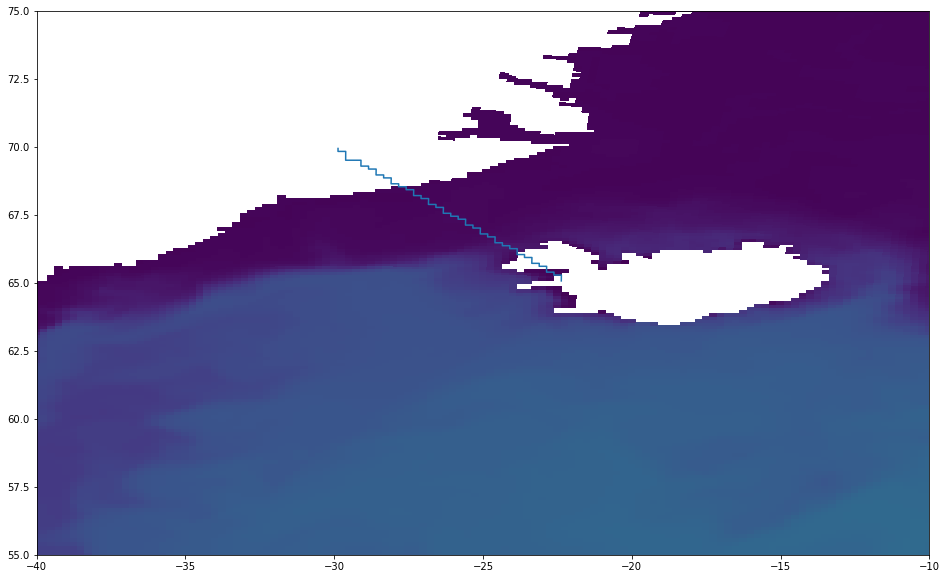

In [6]:
import matplotlib.pylab as plt
plt.figure(figsize=[16,10])
plt.pcolormesh(ds['lon'], ds['lat'], ds['tos'].isel(time=0))
plt.plot(xsec, ysec)
plt.axis([-40,-10, 55, 75])
plt.show()

The grid cell indices are then ready to be used to compute the section.

## The more detailed way

In [7]:
# create linear fit between these 2 points
func = sectionate.linear_fit(ds['lon'], ds['lat'], lon1, lat1, lon2, lat2)

In [8]:
# find the zero contour
cont = sectionate.create_zero_contour(func)

In [9]:
# get the broken line
iseg, jseg = sectionate.get_broken_line_from_contour(cont)

In [10]:
# bound broken line between 2 points
iseg_bnd, jseg_bnd, xseg_bnd, yseg_bnd = sectionate.bound_broken_line(ds['lon'], ds['lat'], lon1, lat1, 
                                                                      lon2, lat2, iseg, jseg)

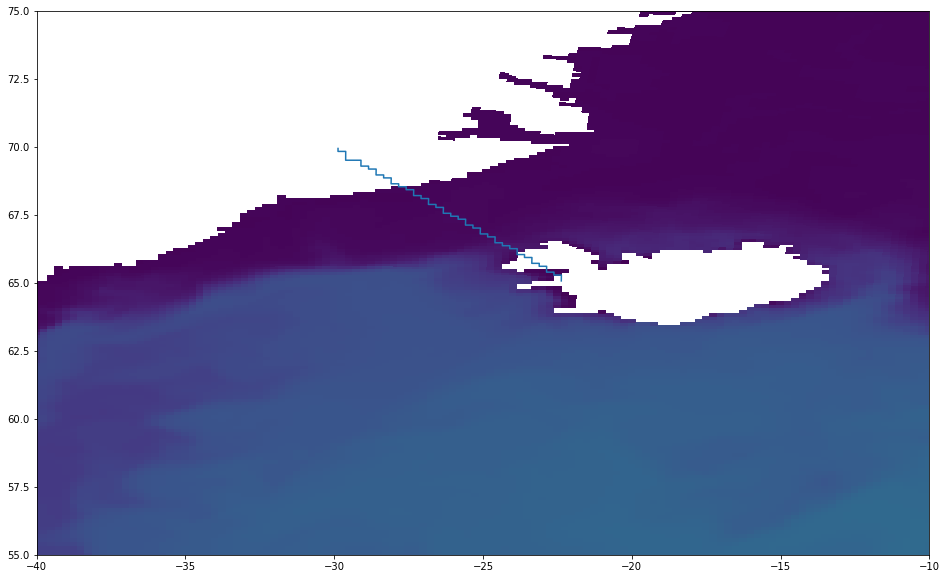

In [11]:
import matplotlib.pylab as plt
plt.figure(figsize=[16,10])
plt.pcolormesh(ds['lon'], ds['lat'], ds['tos'].isel(time=0))
plt.plot(xseg_bnd, yseg_bnd)
plt.axis([-40,-10, 55, 75])
plt.show()